# Decision Trees and Random Forests

## Machine Learning Methods 


### Module 6: Advanced Machine Learning Models 
### Part 2: Decision Trees and Random Forests

### Instructor: Farhad Pourkamali



### Overview 
<hr style="border:2px solid gray">

* Video: https://youtu.be/zPg7hIMQEI0 

* A decision tree is a non-parametric supervised learning algorithm used for both classification and regression tasks. 
    - In a decision tree, the structure of the tree (number of nodes, depth, etc.) is not fixed beforehand. It is determined during the training process by the data itself.

* The tree consists of:

    - Root node: Represents the entire data set and initiates the splitting process.

    - Internal nodes: Each internal node denotes a test or decision rule on an attribute/feature, leading to further branches.

    - Branches: Illustrate the outcomes of the tests, connecting nodes and indicating the flow of decisions.

    - Leaf nodes (terminal nodes): Represent the final output or decision, such as a class label in classification tasks or a continuous value in regression tasks.
    
<img src="https://github.com/farhad-pourkamali/MATH4388Online/blob/main/images/tree.png?raw=true" width=250>


# 1. Structure of Decision Trees
    
- **Understanding decision trees with the Iris data set**

    - The Iris data set is a well-known multiclass classification data set in machine learning. It contains 150 samples from 3 species of Iris flowers:

        - Iris setosa (50 samples)
        - Iris versicolor (50 samples)
        - Iris virginica (50 samples)

    - Each sample has 4 numerical feature:
        - Sepal length (cm)
        - Sepal width (cm)
        - Petal length (cm)
        - Petal width (cm)

> **Note:** In this particular decision tree, only petal length and petal width are used to make splits.


- This diagram shows a trained decision tree that classifies iris flowers into the three species based on petal length and petal width.

- The tree is composed of:
    - Root node: the top-most decision point
    - Internal nodes: intermediate decision points
    - Leaf nodes: terminal nodes where predictions are made

- Each node contains:
    - A splitting rule (e.g., `petal length <= 2.45`)
    - Gini impurity: a measure of how mixed the classes are (0 = pure)
    - Number of samples: total samples that reached this node
    - Value: number of samples from each class `[setosa, versicolor, virginica]`
    - Predicted class: the majority class at that node
    
<img src="https://github.com/farhad-pourkamali/MATH4388Online/blob/main/images/DT.png?raw=true" width=500>
    
#### 🔷 Root Node

- This is the root node, where all 150 samples start.
- Gini impurity is high, indicating all three species are mixed.
- It splits the data set based on whether petal length is ≤ 2.45.

🟧 Left Child of Root (Leaf Node)

- All samples are Iris setosa — perfectly pure.
- No further splitting needed.

⬜ Right Child of Root (Internal Node)

- Only versicolor and virginica remain.
- Splits based on petal width to further separate the two classes.

🟩 Left Child of Internal Node (Leaf Node)
- Majority are versicolor, with a few virginica.
- Gini is fairly low (mostly pure).

🟪 Right Child of Internal Node (Leaf Node)

- Nearly all samples are virginica.
- Very pure node (low Gini).


# 2. Gini Impurity
<hr style="border:2px solid gray">

- The **Gini impurity** is a measure of how mixed the classes are at a particular node in a decision tree.

    - A pure node (Gini = 0) contains samples from only one class.
    - The higher the Gini impurity (maximum = 0.5 for 2 classes, or ~0.67 for 3 balanced classes), the more mixed the node is.

- Mathematical Formula:

    - Let:
        - $S$: the set of samples at the node
        - $S_k$: the subset of samples in class $k$
        - $p_k = \frac{|S_k|}{|S|}$: the proportion of samples in class $k$

    - Then the Gini impurity is:

$$
\text{Gini} = \sum_k p_k (1 - p_k) = 1 - \sum_k p_k^2
$$


In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=50,  random_state=42)

tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=50, random_state=42)

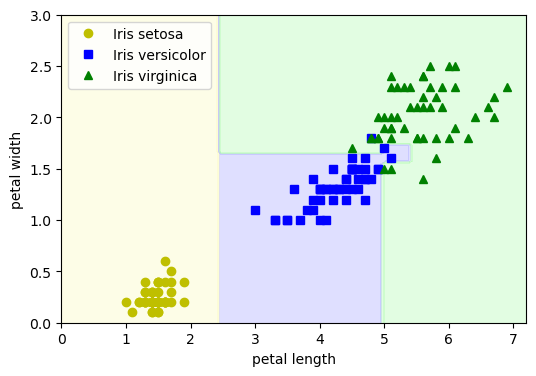

In [2]:
from matplotlib.colors import ListedColormap

# Define a custom color map for the 3 iris classes
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

# Set the figure size for the plot
plt.figure(figsize=(6, 4))

# Create a 2D grid of points covering the petal length and width space
# This will be used to visualize the decision boundaries
lengths, widths = np.meshgrid(
    np.linspace(0, 7.2, 100),   # petal length from 0 to 7.2 cm
    np.linspace(0, 3, 100)      # petal width from 0 to 3 cm
)

# Combine the grid points into a (10000 x 2) matrix — each row is a point in the feature space
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]

# Use the trained decision tree to predict the class at each grid point
# Then reshape the predictions back into a 100x100 grid
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)

# Plot the predicted class regions as filled contours (decision boundaries)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

# Overlay the actual training data points using different markers for each class
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(
        X_iris[:, 0][y_iris == idx],   # petal length for class `idx`
        X_iris[:, 1][y_iris == idx],   # petal width for class `idx`
        style,                         # marker style: yellow circles, blue squares, green triangles
        label=f"Iris {name}"           # legend label
    )

# Label the axes
plt.xlabel("petal length")
plt.ylabel("petal width")

# Add a legend to identify each class
plt.legend()

# Display the plot
plt.show()


# 3. CART in Scikit-learn
<hr style="border:2px solid gray">


- Scikit-learn employs the Classification and Regression Trees (CART) algorithm to train decision trees for both classification and regression tasks.

- CART constructs binary trees by recursively splitting nodes based on features that yield the most information gain, aiming to create child nodes that are as homogeneous as possible.


- In scikit-learn, the following classes implement the CART algorithm:

- `DecisionTreeClassifier`: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
- `DecisionTreeRegressor`: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

- Key Parameters

| Parameter            | Description |
|----------------------|-------------|
| **`criterion`**      | Function to measure the quality of a split. <br> - For classification: `"gini"` (Gini impurity). <br> - For regression: `"squared_error"` (MSE). |
| **`splitter`**       | Strategy for choosing the split at each node. <br> - `"best"`: chooses the best split. <br> - `"random"`: chooses the best random split. |
| **`max_depth`**      | Maximum depth of the tree. <br> - Helps control overfitting. |
| **`min_samples_split`** | Minimum number of samples required to split an internal node. |
| **`min_samples_leaf`**  | Minimum number of samples required to be at a leaf node. |

- "random" split (or "best random subset of features"):
    - This strategy introduces randomness to the split selection process.
    - Instead of evaluating all features, it randomly selects a subset of features at each node.
    - Then, it evaluates all possible splits within that randomly selected subset of features.
    - Finally, it chooses the "best" split from among those considered in the random subset.

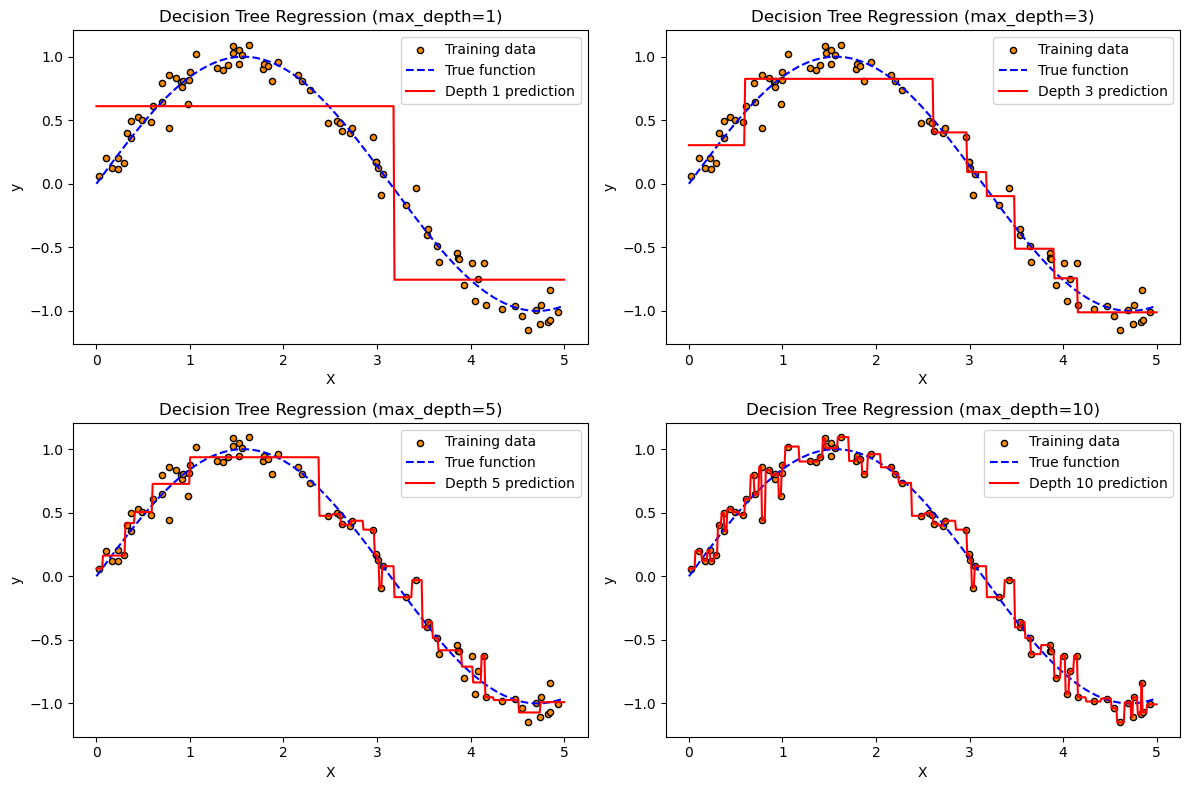

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# 1. Generate synthetic data: noisy sine wave
np.random.seed(42)
X = np.sort(np.random.rand(80, 1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# 2. Generate test data for smooth plotting
X_test = np.linspace(0, 5, 500).reshape(-1, 1)

# 3. Fit models with different tree depths
depths = [1, 3, 5, 10]  # Try shallow to deep trees
models = [DecisionTreeRegressor(max_depth=d, random_state=0).fit(X, y) for d in depths]
predictions = [model.predict(X_test) for model in models]

# 4. Plot
plt.figure(figsize=(12, 8))
for i, depth in enumerate(depths):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X, y, s=20, edgecolor="k", c="darkorange", label="Training data")
    plt.plot(X_test, np.sin(X_test), "b--", label="True function")
    plt.plot(X_test, predictions[i], "r", label=f"Depth {depth} prediction")
    plt.title(f"Decision Tree Regression (max_depth={depth})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.tight_layout()
plt.show()


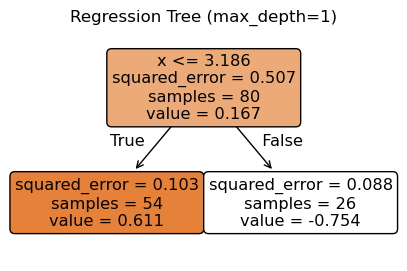

In [4]:
from sklearn.tree import plot_tree

# Choose one model to visualize (e.g., depth = 1)
depth = 1
tree_model = DecisionTreeRegressor(max_depth=depth, random_state=0)
tree_model.fit(X, y)

# Plot the tree structure
plt.figure(figsize=(5, 3))
plot_tree(tree_model, filled=True, feature_names=["x"], rounded=True)
plt.title(f"Regression Tree (max_depth={depth})")
plt.show()


### ✅ Advantages of Decision Trees

1. Decision trees often reflect how humans make decisions, which makes them easier to understand and trust.

2. Trees can be visualized graphically, making their structure and logic clear — even to non-experts (especially if the tree is small).

3. Decision trees can naturally handle categorical (qualitative) predictors without the need for one-hot encoding or dummy variables.


### ⚠️ Disadvantages of Decision Trees

1. Compared to more advanced methods, a single decision tree typically offers lower accuracy on unseen data.

2. Decision trees can be non-robust — small changes in the training data can lead to drastically different tree structures and predictions.

# 4. Bagging (Bootstrap Aggregating)

- Bagging is an ensemble technique designed to improve the stability and accuracy of machine learning models, especially high-variance models like decision trees.

1. **Bootstrap Sampling**:  
   From the original data set $\mathcal{D}$ of size $N$, create $B$ new data sets $\mathcal{D}_1, \mathcal{D}_2, ..., \mathcal{D}_B$ by sampling with replacement. Each bootstrap sample is the same size $N$, but may contain duplicates.

2. **Model Training**:  
   Train a separate model $f_b$ on each bootstrap sample $\mathcal{D}_b$.

3. **Prediction Aggregation**:
   - **Regression**: Use the average of predictions:

     $$
     \hat{y}(x) = \frac{1}{B} \sum_{b=1}^{B} f_b(x)
     $$
   - **Classification**: Use majority voting:

     $$
     \hat{y}(x) = \text{mode}\{f_1(x), f_2(x), ..., f_B(x)\}
     $$


### Random Forests

**Random Forests** are an extension of bagging applied specifically to **decision trees** with additional randomness to further reduce correlation among trees.

1. **Bootstrap Sampling**:  
   As in bagging, draw multiple bootstrap data sets from the original training set.

2. **Random Feature Selection at Each Split**:  
   Instead of considering all features at each split, randomly select a subset of features for split evaluation. This increases diversity among the trees.


3. **Prediction Aggregation**:
   - **Regression**:

     $$
     \hat{y}(x) = \frac{1}{B} \sum_{b=1}^{B} f_b(x)
     $$
   - **Classification**:
   
     $$
     \hat{y}(x) = \text{mode}\{f_1(x), f_2(x), ..., f_B(x)\}
     $$


### Random Forest in Scikit-learn

- In `scikit-learn`, the `RandomForestClassifier` and `RandomForestRegressor` classes implement the **Random Forest** algorithm based on **bagging** and **random feature selection**.

```python
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
```

- Key Parameters (Scikit-learn)

| Parameter           | Description                                                                                   | Typical Value                                      |
|--------------------|-----------------------------------------------------------------------------------------------|----------------------------------------------------|
| `n_estimators`      | Number of trees in the forest. More trees reduce variance but increase computation time.      | `100` (default), `200`, `500`, etc.               |
| `max_features`      | Number of features to consider when looking for the best split.                               | `"sqrt"` (classification), `"auto"` or `1/3` (regression) |
| `bootstrap`         | Whether bootstrap samples are used when building trees.                                       | `True` (default)                                   |
| `max_depth`         | Maximum depth of each tree. Controls overfitting.                                             | `None` (grow fully), or set like `10`, `20`        |

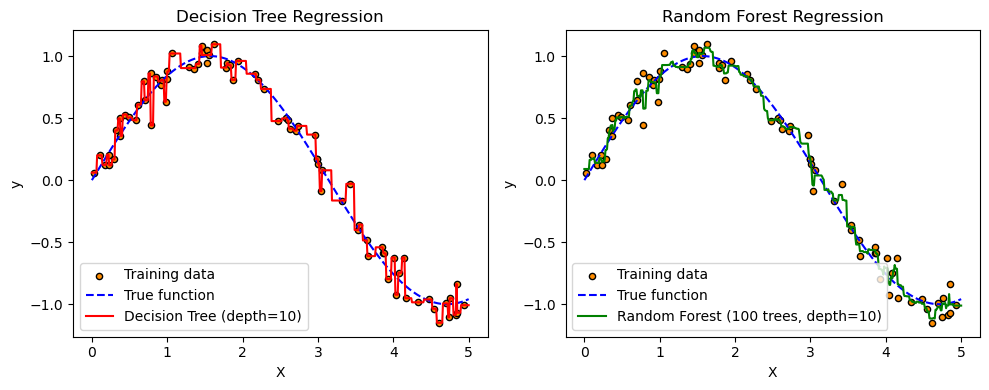

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

# 1. Generate synthetic data: noisy sine wave
np.random.seed(42)
X = np.sort(np.random.rand(80, 1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# 2. Generate test data for smooth plotting
X_test = np.linspace(0, 5, 500).reshape(-1, 1)

# 3. Fit a decision tree and a random forest (both with max_depth=10)
tree = DecisionTreeRegressor(max_depth=10, random_state=0)
forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)

tree.fit(X, y)
forest.fit(X, y)

tree_pred = tree.predict(X_test)
forest_pred = forest.predict(X_test)

# 4. Plot comparison: decision tree vs. random forest
plt.figure(figsize=(10, 4))

# (a) Decision Tree
plt.subplot(1, 2, 1)
plt.scatter(X, y, s=20, edgecolor="k", c="darkorange", label="Training data")
plt.plot(X_test, np.sin(X_test), "b--", label="True function")
plt.plot(X_test, tree_pred, "r", label="Decision Tree (depth=10)")
plt.title("Decision Tree Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# (b) Random Forest
plt.subplot(1, 2, 2)
plt.scatter(X, y, s=20, edgecolor="k", c="darkorange", label="Training data")
plt.plot(X_test, np.sin(X_test), "b--", label="True function")
plt.plot(X_test, forest_pred, "g", label="Random Forest (100 trees, depth=10)")
plt.title("Random Forest Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()